In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
'''
FEATURES:
Overall action count/ratio          DONE
Overall day count                   DONE
Monthly action count/ratio          DONE
Product Diversity                   DONE
Penetration                     TODO
Monthly Aggregation             TODO
User Aggregation                TODO
Double 11 Features                  DONE
Latest One-Week                     DONE
Repeat Buyer Features           TODO
LDA Features                        DONE
PCA Features                        DONE
Age Related                     TODO
Gender Related                  TODO

'''

'\nFEATURES:\nOverall action count/ratio          DONE\nOverall day count                   DONE\nMonthly action count/ratio          DONE\nProduct Diversity                   DONE\nPenetration                     TODO\nMonthly Aggregation             TODO\nUser Aggregation                TODO\nDouble 11 Features                  DONE\nLatest One-Week                     DONE\nRepeat Buyer Features           TODO\nLDA Features                        DONE\nPCA Features                        DONE\nAge Related                     TODO\nGender Related                  TODO\n\n'

In [2]:
df = pd.read_csv("./use_data/expanded_training.csv")
df

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type,age_range,gender,label
0,379824,198,656,145,3462.0,1111,0,5.0,1.0,0
1,379824,198,656,145,3462.0,1111,0,5.0,1.0,0
2,379824,198,656,145,3462.0,1111,2,5.0,1.0,0
3,379824,198,656,145,3462.0,1110,0,5.0,1.0,0
4,379824,198,656,145,3462.0,1110,0,5.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...
380,122632,175,1181,4760,247.0,1109,0,3.0,0.0,0
381,122632,175,1181,4760,247.0,1108,0,3.0,0.0,0
382,122632,175,1181,4760,247.0,1108,0,3.0,0.0,0
383,95362,253,962,3263,626.0,1111,0,0.0,0.0,0


In [3]:
# seller == merchant
df_merchant = df[['seller_id']]
df_merchant

,seller_id
0,145
1,145
2,145
3,145
4,145
...,...
380,4760
381,4760
382,4760
383,3263


In [4]:
# Overall action count/ratio
actions = {}

# go through user_seller sub-dataframe and split entries by user_id:seller_id
for index, row in df.iterrows():
    if row['seller_id'] not in actions:
        # there may be multiple entries, so default with an empty list
        actions[row["seller_id"]] = [] 
    actions[row["seller_id"]].append(row["action_type"])

In [5]:
actions

{145.0: [0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  3.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 4760.0: [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  2.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  3.0,
  3.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  3.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.

In [6]:
#for k,v in actions.items():
#    actions[k] = list(set(v)) # make each value list unique
#actions

# same amount?

In [7]:
action_count = {}
for key in actions.keys():
    action_count[key] = len(actions[key])
action_count

{145.0: 36,
 4760.0: 105,
 246.0: 19,
 3323.0: 85,
 1131.0: 6,
 1943.0: 21,
 630.0: 2,
 1210.0: 2,
 4955.0: 12,
 4129.0: 4,
 3263.0: 18,
 3593.0: 1,
 1784.0: 4,
 3766.0: 3,
 1536.0: 1,
 3828.0: 2,
 2277.0: 30,
 4282.0: 6,
 314.0: 6,
 4405.0: 9,
 4988.0: 2,
 1200.0: 7,
 2443.0: 1,
 2820.0: 1,
 2642.0: 1,
 2226.0: 1}

In [8]:
# total action count
total_action_count = sum(action_count.values())
total_action_count

385

In [9]:
action_count_ratio = {}
for key in action_count:
    action_count_ratio[key] = action_count[key]/total_action_count
action_count_ratio

{145.0: 0.09350649350649351,
 4760.0: 0.2727272727272727,
 246.0: 0.04935064935064935,
 3323.0: 0.22077922077922077,
 1131.0: 0.015584415584415584,
 1943.0: 0.05454545454545454,
 630.0: 0.005194805194805195,
 1210.0: 0.005194805194805195,
 4955.0: 0.03116883116883117,
 4129.0: 0.01038961038961039,
 3263.0: 0.046753246753246755,
 3593.0: 0.0025974025974025974,
 1784.0: 0.01038961038961039,
 3766.0: 0.007792207792207792,
 1536.0: 0.0025974025974025974,
 3828.0: 0.005194805194805195,
 2277.0: 0.07792207792207792,
 4282.0: 0.015584415584415584,
 314.0: 0.015584415584415584,
 4405.0: 0.023376623376623377,
 4988.0: 0.005194805194805195,
 1200.0: 0.01818181818181818,
 2443.0: 0.0025974025974025974,
 2820.0: 0.0025974025974025974,
 2642.0: 0.0025974025974025974,
 2226.0: 0.0025974025974025974}

In [10]:
df_merchant['merchant action count'] = -1
df_merchant['merchant action count ratio'] = -1
for index,row in df_merchant.iterrows():
        df_merchant.at[index, 'merchant action count'] = action_count[row['seller_id']]
        df_merchant.at[index, 'merchant action count ratio'] = action_count_ratio[row['seller_id']]

df_merchant

C:\Users\sonic\AppData\Local\Temp\ipykernel_37760\345860918.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merchant['merchant action count'] = -1
C:\Users\sonic\AppData\Local\Temp\ipykernel_37760\345860918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merchant['merchant action count ratio'] = -1
C:\Users\sonic\AppData\Local\Temp\ipykernel_37760\345860918.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

,seller_id,merchant action count,merchant action count ratio
0,145,36,0.093506
1,145,36,0.093506
2,145,36,0.093506
3,145,36,0.093506
4,145,36,0.093506
...,...,...,...
380,4760,105,0.272727
381,4760,105,0.272727
382,4760,105,0.272727
383,3263,18,0.046753


In [11]:
#FEATURE 2: OVERALL DAY COUNT
days = {}

# go through user_seller sub-dataframe and split entries by user_id:seller_id
for index, row in df.iterrows():
    if row['seller_id'] not in days:
        # there may be multiple entries, so default with an empty list
        days[row["seller_id"]] = [] 
    days[row["seller_id"]].append(row["time_stamp"])

In [12]:
for k,v in days.items():
    days[k] = list(set(v)) # make each value list unique
days

{145.0: [1105.0, 1109.0, 1110.0, 1111.0],
 4760.0: [1026.0,
  1101.0,
  1103.0,
  1106.0,
  1107.0,
  1108.0,
  1109.0,
  1110.0,
  1111.0],
 246.0: [1103.0, 1104.0, 1105.0, 1107.0, 1108.0, 1109.0, 1111.0],
 3323.0: [1030.0,
  617.0,
  522.0,
  524.0,
  529.0,
  1105.0,
  1107.0,
  1108.0,
  1109.0,
  1110.0,
  1111.0,
  603.0],
 1131.0: [1105.0, 1108.0, 1109.0, 1111.0],
 1943.0: [1105.0, 1109.0, 1111.0],
 630.0: [520.0, 1110.0],
 1210.0: [1111.0],
 4955.0: [1108.0, 1109.0, 1111.0],
 4129.0: [1108.0, 1022.0, 1103.0],
 3263.0: [1110.0, 1111.0],
 3593.0: [1111.0],
 1784.0: [1111.0],
 3766.0: [1110.0, 1111.0],
 1536.0: [1111.0],
 3828.0: [528.0, 601.0],
 2277.0: [1103.0, 1105.0, 1106.0, 1108.0, 1109.0, 1110.0, 1111.0],
 4282.0: [801.0, 627.0, 804.0, 806.0],
 314.0: [1111.0],
 4405.0: [1026.0, 1101.0, 1110.0, 1111.0],
 4988.0: [1110.0],
 1200.0: [1110.0, 1111.0],
 2443.0: [1110.0],
 2820.0: [1001.0],
 2642.0: [1111.0],
 2226.0: [1109.0]}

In [13]:
day_count = {}
for key in days.keys():
    day_count[key] = len(days[key])
day_count

{145.0: 4,
 4760.0: 9,
 246.0: 7,
 3323.0: 12,
 1131.0: 4,
 1943.0: 3,
 630.0: 2,
 1210.0: 1,
 4955.0: 3,
 4129.0: 3,
 3263.0: 2,
 3593.0: 1,
 1784.0: 1,
 3766.0: 2,
 1536.0: 1,
 3828.0: 2,
 2277.0: 7,
 4282.0: 4,
 314.0: 1,
 4405.0: 4,
 4988.0: 1,
 1200.0: 2,
 2443.0: 1,
 2820.0: 1,
 2642.0: 1,
 2226.0: 1}

In [14]:
df_merchant['merchant day count'] = -1
for index,row in df_merchant.iterrows():
        df_merchant.at[index, 'merchant day count'] = day_count[row['seller_id']]

df_merchant

C:\Users\sonic\AppData\Local\Temp\ipykernel_37760\3594710395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merchant['merchant day count'] = -1


,seller_id,merchant action count,merchant action count ratio,merchant day count
0,145,36,0.093506,4
1,145,36,0.093506,4
2,145,36,0.093506,4
3,145,36,0.093506,4
4,145,36,0.093506,4
...,...,...,...,...
380,4760,105,0.272727,9
381,4760,105,0.272727,9
382,4760,105,0.272727,9
383,3263,18,0.046753,2


In [15]:
#FEATURE 3: Monthly ACTION/COUNT ratio


In [16]:
#FEATURE 4: Product Diversity
items = {}

# go through user_seller sub-dataframe and split entries by user_id:seller_id
for index, row in df.iterrows():
    if row['item_id'] not in items:
        # there may be multiple entries, so default with an empty list
        items[row["seller_id"]] = [] 
    items[row["seller_id"]].append(row["item_id"])

In [17]:
for k,v in items.items():
    items[k] = list(set(v)) # make each value list unique
items

{145.0: [184.0],
 4760.0: [175.0],
 246.0: [281.0],
 3323.0: [279.0],
 1131.0: [190.0],
 1943.0: [219.0],
 630.0: [285.0],
 1210.0: [278.0],
 4955.0: [224.0],
 4129.0: [312.0],
 3263.0: [253.0],
 3593.0: [274.0],
 1784.0: [226.0],
 3766.0: [209.0],
 1536.0: [319.0],
 3828.0: [170.0],
 2277.0: [211.0],
 4282.0: [277.0],
 314.0: [291.0],
 4405.0: [221.0],
 4988.0: [169.0],
 1200.0: [186.0],
 2443.0: [269.0],
 2820.0: [215.0],
 2642.0: [315.0],
 2226.0: [191.0]}

In [18]:
item_count = {}
for key in items.keys():
    item_count[key] = len(items[key])
item_count

{145.0: 1,
 4760.0: 1,
 246.0: 1,
 3323.0: 1,
 1131.0: 1,
 1943.0: 1,
 630.0: 1,
 1210.0: 1,
 4955.0: 1,
 4129.0: 1,
 3263.0: 1,
 3593.0: 1,
 1784.0: 1,
 3766.0: 1,
 1536.0: 1,
 3828.0: 1,
 2277.0: 1,
 4282.0: 1,
 314.0: 1,
 4405.0: 1,
 4988.0: 1,
 1200.0: 1,
 2443.0: 1,
 2820.0: 1,
 2642.0: 1,
 2226.0: 1}

In [19]:
total_item_count = sum(item_count.values())
total_item_count

26

In [20]:
item_count_diversity = {}
for key in item_count:
    item_count_diversity[key]= item_count[key]/total_item_count
item_count_diversity

{145.0: 0.038461538461538464,
 4760.0: 0.038461538461538464,
 246.0: 0.038461538461538464,
 3323.0: 0.038461538461538464,
 1131.0: 0.038461538461538464,
 1943.0: 0.038461538461538464,
 630.0: 0.038461538461538464,
 1210.0: 0.038461538461538464,
 4955.0: 0.038461538461538464,
 4129.0: 0.038461538461538464,
 3263.0: 0.038461538461538464,
 3593.0: 0.038461538461538464,
 1784.0: 0.038461538461538464,
 3766.0: 0.038461538461538464,
 1536.0: 0.038461538461538464,
 3828.0: 0.038461538461538464,
 2277.0: 0.038461538461538464,
 4282.0: 0.038461538461538464,
 314.0: 0.038461538461538464,
 4405.0: 0.038461538461538464,
 4988.0: 0.038461538461538464,
 1200.0: 0.038461538461538464,
 2443.0: 0.038461538461538464,
 2820.0: 0.038461538461538464,
 2642.0: 0.038461538461538464,
 2226.0: 0.038461538461538464}

In [21]:
df_merchant['merchant product diversity'] = -1
for index,row in df_merchant.iterrows():
        df_merchant.at[index, 'merchant product diversity'] = item_count_diversity[row['seller_id']]

df_merchant

C:\Users\sonic\AppData\Local\Temp\ipykernel_37760\1602293768.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merchant['merchant product diversity'] = -1
C:\Users\sonic\AppData\Local\Temp\ipykernel_37760\1602293768.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merchant.at[index, 'merchant product diversity'] = item_count_diversity[row['seller_id']]


,seller_id,merchant action count,merchant action count ratio,merchant day count,merchant product diversity
0,145,36,0.093506,4,0.038462
1,145,36,0.093506,4,0.038462
2,145,36,0.093506,4,0.038462
3,145,36,0.093506,4,0.038462
4,145,36,0.093506,4,0.038462
...,...,...,...,...,...
380,4760,105,0.272727,9,0.038462
381,4760,105,0.272727,9,0.038462
382,4760,105,0.272727,9,0.038462
383,3263,18,0.046753,2,0.038462


In [22]:
#FEATURE 9: DOUBLE 11 FEATURES
df_11 = df[df['time_stamp']==1111]
df_11

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type,age_range,gender,label
0,379824,198,656,145,3462.0,1111,0,5.0,1.0,0
1,379824,198,656,145,3462.0,1111,0,5.0,1.0,0
2,379824,198,656,145,3462.0,1111,2,5.0,1.0,0
9,141307,175,1181,4760,247.0,1111,0,4.0,1.0,0
10,141307,175,1181,4760,247.0,1111,0,4.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...
375,289079,279,898,3323,683.0,1111,0,4.0,1.0,1
377,403117,175,1181,4760,247.0,1111,0,2.0,1.0,0
378,36385,219,349,1943,6208.0,1111,2,0.0,0.0,0
379,36385,219,349,1943,6208.0,1111,0,0.0,0.0,0


In [23]:
actions_11 = {}

# go through user_seller sub-dataframe and split entries by user_id:seller_id
for index, row in df_11.iterrows():
    if row['seller_id'] not in actions_11:
        # there may be multiple entries, so default with an empty list
        actions_11[row["seller_id"]] = [] 
    actions_11[row["seller_id"]].append(row["action_type"])

In [24]:
#for k,v in actions_11.items():
#    actions_11[k] = list(set(v)) # make each value list unique

In [25]:
actions_11

{145.0: [0.0,
  0.0,
  2.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  3.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0],
 4760.0: [0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  2.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0,
  2.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0],
 246.0: [2.0, 0.0, 0.0, 2.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0],
 3323.0: [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,


In [26]:
action_count_11 = {}
for key in actions_11.keys():
    action_count_11[key] = len(actions_11[key])
action_count_11

{145.0: 30,
 4760.0: 67,
 246.0: 11,
 3323.0: 46,
 1943.0: 17,
 1210.0: 2,
 4955.0: 10,
 3263.0: 13,
 3593.0: 1,
 1784.0: 4,
 1536.0: 1,
 2277.0: 12,
 314.0: 6,
 4405.0: 3,
 3766.0: 1,
 1131.0: 1,
 1200.0: 2,
 2642.0: 1}

In [27]:
total_action_count_11 = sum(action_count_11.values())
total_action_count_11

228

In [28]:
action_count_ratio_11 = {}
for key in action_count_11:
    action_count_ratio_11[key] = action_count_11[key]/total_action_count_11
action_count_ratio_11

{145.0: 0.13157894736842105,
 4760.0: 0.29385964912280704,
 246.0: 0.04824561403508772,
 3323.0: 0.20175438596491227,
 1943.0: 0.07456140350877193,
 1210.0: 0.008771929824561403,
 4955.0: 0.043859649122807015,
 3263.0: 0.05701754385964912,
 3593.0: 0.0043859649122807015,
 1784.0: 0.017543859649122806,
 1536.0: 0.0043859649122807015,
 2277.0: 0.05263157894736842,
 314.0: 0.02631578947368421,
 4405.0: 0.013157894736842105,
 3766.0: 0.0043859649122807015,
 1131.0: 0.0043859649122807015,
 1200.0: 0.008771929824561403,
 2642.0: 0.0043859649122807015}

In [29]:
df_merchant['merchant 1111 action count'] = 0
df_merchant['merchant 1111 action count ratio'] = 0
for index,row in df_merchant.iterrows():
        if row['seller_id'] in action_count_11.keys():
            df_merchant.at[index, 'merchant 1111 action count'] = action_count_11[row['seller_id']]
        if row['seller_id'] in action_count_ratio_11.keys():
            df_merchant.at[index, 'merchant 1111 action count ratio'] = action_count_ratio_11[row['seller_id']]

df_merchant

C:\Users\sonic\AppData\Local\Temp\ipykernel_37760\3269018672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merchant['merchant 1111 action count'] = 0
C:\Users\sonic\AppData\Local\Temp\ipykernel_37760\3269018672.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merchant['merchant 1111 action count ratio'] = 0
C:\Users\sonic\AppData\Local\Temp\ipykernel_37760\3269018672.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

,seller_id,merchant action count,merchant action count ratio,merchant day count,merchant product diversity,merchant 1111 action count,merchant 1111 action count ratio
0,145,36,0.093506,4,0.038462,30,0.131579
1,145,36,0.093506,4,0.038462,30,0.131579
2,145,36,0.093506,4,0.038462,30,0.131579
3,145,36,0.093506,4,0.038462,30,0.131579
4,145,36,0.093506,4,0.038462,30,0.131579
...,...,...,...,...,...,...,...
380,4760,105,0.272727,9,0.038462,67,0.293860
381,4760,105,0.272727,9,0.038462,67,0.293860
382,4760,105,0.272727,9,0.038462,67,0.293860
383,3263,18,0.046753,2,0.038462,13,0.057018


In [30]:
activity_ratio_1111 = {}
df_merchant['merchant 1111 activity ratio'] = 0
for index,row in df_merchant.iterrows():
    if df_merchant.at[index,'merchant 1111 action count'] != 0:
        df_merchant.at[index, 'merchant 1111 activity ratio'] = (df_merchant.at[index,'merchant 1111 action count']/df_merchant.at[index,'merchant action count'])
df_merchant

C:\Users\sonic\AppData\Local\Temp\ipykernel_37760\817184100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merchant['merchant 1111 activity ratio'] = 0
C:\Users\sonic\AppData\Local\Temp\ipykernel_37760\817184100.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merchant.at[index, 'merchant 1111 activity ratio'] = (df_merchant.at[index,'merchant 1111 action count']/df_merchant.at[index,'merchant action count'])


,seller_id,merchant action count,merchant action count ratio,merchant day count,merchant product diversity,merchant 1111 action count,merchant 1111 action count ratio,merchant 1111 activity ratio
0,145,36,0.093506,4,0.038462,30,0.131579,0.833333
1,145,36,0.093506,4,0.038462,30,0.131579,0.833333
2,145,36,0.093506,4,0.038462,30,0.131579,0.833333
3,145,36,0.093506,4,0.038462,30,0.131579,0.833333
4,145,36,0.093506,4,0.038462,30,0.131579,0.833333
...,...,...,...,...,...,...,...,...
380,4760,105,0.272727,9,0.038462,67,0.293860,0.638095
381,4760,105,0.272727,9,0.038462,67,0.293860,0.638095
382,4760,105,0.272727,9,0.038462,67,0.293860,0.638095
383,3263,18,0.046753,2,0.038462,13,0.057018,0.722222


In [31]:
# LATEST ONE WEEK
latest_week = 1104
df_latest_week = df[df['time_stamp']>=latest_week]
df_latest_week

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type,age_range,gender,label
0,379824,198,656,145,3462.0,1111,0,5.0,1.0,0
1,379824,198,656,145,3462.0,1111,0,5.0,1.0,0
2,379824,198,656,145,3462.0,1111,2,5.0,1.0,0
3,379824,198,656,145,3462.0,1110,0,5.0,1.0,0
4,379824,198,656,145,3462.0,1110,0,5.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...
380,122632,175,1181,4760,247.0,1109,0,3.0,0.0,0
381,122632,175,1181,4760,247.0,1108,0,3.0,0.0,0
382,122632,175,1181,4760,247.0,1108,0,3.0,0.0,0
383,95362,253,962,3263,626.0,1111,0,0.0,0.0,0


In [32]:
actions_last_week = {}

# go through user_seller sub-dataframe and split entries by seller_id:seller_id
for index, row in df_latest_week.iterrows():
    if row['seller_id'] not in actions_last_week:
        # there may be multiple entries, so default with an empty list
        actions_last_week[row["seller_id"]] = [] 
    actions_last_week[row["seller_id"]].append(row["action_type"])
    
#for k,v in actions_last_week.items():
#    actions_last_week[k] = list(set(v)) # make each value list unique
actions_last_week

{145.0: [0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  3.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 4760.0: [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  2.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  3.0,
  3.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  3.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 246.0: [0.0,
  0.0,
  0

In [33]:
action_count_last_week = {}
for key in actions_last_week.keys():
    action_count_last_week[key] = len(actions_last_week[key])
action_count_last_week

{145.0: 36,
 4760.0: 101,
 246.0: 18,
 3323.0: 75,
 1131.0: 6,
 1943.0: 21,
 1210.0: 2,
 4955.0: 12,
 3263.0: 18,
 3593.0: 1,
 1784.0: 4,
 3766.0: 3,
 1536.0: 1,
 2277.0: 29,
 630.0: 1,
 314.0: 6,
 4405.0: 7,
 4988.0: 2,
 1200.0: 7,
 2443.0: 1,
 4129.0: 2,
 2642.0: 1,
 2226.0: 1}

In [34]:
total_action_count_last_week = sum(action_count_last_week.values())
total_action_count_last_week

355

In [35]:
action_count_ratio_last_week = {}
for key in action_count_last_week:
    action_count_ratio_last_week[key] = action_count_last_week[key]/total_action_count_last_week
action_count_ratio_last_week

{145.0: 0.10140845070422536,
 4760.0: 0.28450704225352114,
 246.0: 0.05070422535211268,
 3323.0: 0.2112676056338028,
 1131.0: 0.016901408450704224,
 1943.0: 0.059154929577464786,
 1210.0: 0.005633802816901409,
 4955.0: 0.03380281690140845,
 3263.0: 0.05070422535211268,
 3593.0: 0.0028169014084507044,
 1784.0: 0.011267605633802818,
 3766.0: 0.008450704225352112,
 1536.0: 0.0028169014084507044,
 2277.0: 0.08169014084507042,
 630.0: 0.0028169014084507044,
 314.0: 0.016901408450704224,
 4405.0: 0.01971830985915493,
 4988.0: 0.005633802816901409,
 1200.0: 0.01971830985915493,
 2443.0: 0.0028169014084507044,
 4129.0: 0.005633802816901409,
 2642.0: 0.0028169014084507044,
 2226.0: 0.0028169014084507044}

In [36]:
df_merchant['merchant last week action count'] = 0
df_merchant['merchant last week action count ratio'] = 0
for index,row in df_merchant.iterrows():
        if row['seller_id'] in action_count_last_week.keys():
            df_merchant.at[index, 'merchant last week action count'] = action_count_last_week[row['seller_id']]
        if row['seller_id'] in action_count_ratio_last_week.keys():
            df_merchant.at[index, 'merchant last week action count ratio'] = action_count_ratio_last_week[row['seller_id']]

df_merchant

C:\Users\sonic\AppData\Local\Temp\ipykernel_37760\11014329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merchant['merchant last week action count'] = 0


,seller_id,merchant action count,merchant action count ratio,merchant day count,merchant product diversity,merchant 1111 action count,merchant 1111 action count ratio,merchant 1111 activity ratio,merchant last week action count,merchant last week action count ratio
0,145,36,0.093506,4,0.038462,30,0.131579,0.833333,36,0.101408
1,145,36,0.093506,4,0.038462,30,0.131579,0.833333,36,0.101408
2,145,36,0.093506,4,0.038462,30,0.131579,0.833333,36,0.101408
3,145,36,0.093506,4,0.038462,30,0.131579,0.833333,36,0.101408
4,145,36,0.093506,4,0.038462,30,0.131579,0.833333,36,0.101408
...,...,...,...,...,...,...,...,...,...,...
380,4760,105,0.272727,9,0.038462,67,0.293860,0.638095,101,0.284507
381,4760,105,0.272727,9,0.038462,67,0.293860,0.638095,101,0.284507
382,4760,105,0.272727,9,0.038462,67,0.293860,0.638095,101,0.284507
383,3263,18,0.046753,2,0.038462,13,0.057018,0.722222,18,0.050704


In [37]:
activity_ratio_last_week = {}
df_merchant['merchant last week activity ratio'] = 0
for index,row in df_merchant.iterrows():
    if df_merchant.at[index,'merchant last week action count'] != 0:
        df_merchant.at[index, 'merchant last week activity ratio'] = (df_merchant.at[index,'merchant last week action count']/df_merchant.at[index,'merchant action count'])
df_merchant

,seller_id,merchant action count,merchant action count ratio,merchant day count,merchant product diversity,merchant 1111 action count,merchant 1111 action count ratio,merchant 1111 activity ratio,merchant last week action count,merchant last week action count ratio,merchant last week activity ratio
0,145,36,0.093506,4,0.038462,30,0.131579,0.833333,36,0.101408,1.000000
1,145,36,0.093506,4,0.038462,30,0.131579,0.833333,36,0.101408,1.000000
2,145,36,0.093506,4,0.038462,30,0.131579,0.833333,36,0.101408,1.000000
3,145,36,0.093506,4,0.038462,30,0.131579,0.833333,36,0.101408,1.000000
4,145,36,0.093506,4,0.038462,30,0.131579,0.833333,36,0.101408,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
380,4760,105,0.272727,9,0.038462,67,0.293860,0.638095,101,0.284507,0.961905
381,4760,105,0.272727,9,0.038462,67,0.293860,0.638095,101,0.284507,0.961905
382,4760,105,0.272727,9,0.038462,67,0.293860,0.638095,101,0.284507,0.961905
383,3263,18,0.046753,2,0.038462,13,0.057018,0.722222,18,0.050704,1.000000


In [38]:
#FEATURE 11: LATEST MONTH
latest_month = 1011
df_latest_month = df[df['time_stamp']>=latest_month]
df_latest_month

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type,age_range,gender,label
0,379824,198,656,145,3462.0,1111,0,5.0,1.0,0
1,379824,198,656,145,3462.0,1111,0,5.0,1.0,0
2,379824,198,656,145,3462.0,1111,2,5.0,1.0,0
3,379824,198,656,145,3462.0,1110,0,5.0,1.0,0
4,379824,198,656,145,3462.0,1110,0,5.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...
380,122632,175,1181,4760,247.0,1109,0,3.0,0.0,0
381,122632,175,1181,4760,247.0,1108,0,3.0,0.0,0
382,122632,175,1181,4760,247.0,1108,0,3.0,0.0,0
383,95362,253,962,3263,626.0,1111,0,0.0,0.0,0


In [39]:
actions_last_month = {}

# go through user_seller sub-dataframe and split entries by user_id:seller_id
for index, row in df_latest_month.iterrows():
    if row['seller_id'] not in actions_last_month:
        # there may be multiple entries, so default with an empty list
        actions_last_month[row["seller_id"]] = [] 
    actions_last_month[row["seller_id"]].append(row["action_type"])
    
#for k,v in actions_last_month.items():
#    actions_last_month[k] = list(set(v)) # make each value list unique
actions_last_month

{145.0: [0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  3.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 4760.0: [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  2.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  3.0,
  3.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  3.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.

In [40]:
action_count_last_month = {}
for key in actions_last_month.keys():
    action_count_last_month[key] = len(actions_last_month[key])
action_count_last_month

{145.0: 36,
 4760.0: 105,
 246.0: 19,
 3323.0: 76,
 1131.0: 6,
 1943.0: 21,
 1210.0: 2,
 4955.0: 12,
 4129.0: 4,
 3263.0: 18,
 3593.0: 1,
 1784.0: 4,
 3766.0: 3,
 1536.0: 1,
 2277.0: 30,
 630.0: 1,
 314.0: 6,
 4405.0: 9,
 4988.0: 2,
 1200.0: 7,
 2443.0: 1,
 2642.0: 1,
 2226.0: 1}

In [41]:
total_action_count_last_month = sum(action_count_last_month.values())
total_action_count_last_month

366

In [42]:
action_count_ratio_last_month = {}
for key in action_count_last_month:
    action_count_ratio_last_month[key] = action_count_last_month[key]/total_action_count_last_month
action_count_ratio_last_month

{145.0: 0.09836065573770492,
 4760.0: 0.28688524590163933,
 246.0: 0.05191256830601093,
 3323.0: 0.20765027322404372,
 1131.0: 0.01639344262295082,
 1943.0: 0.05737704918032787,
 1210.0: 0.00546448087431694,
 4955.0: 0.03278688524590164,
 4129.0: 0.01092896174863388,
 3263.0: 0.04918032786885246,
 3593.0: 0.00273224043715847,
 1784.0: 0.01092896174863388,
 3766.0: 0.00819672131147541,
 1536.0: 0.00273224043715847,
 2277.0: 0.08196721311475409,
 630.0: 0.00273224043715847,
 314.0: 0.01639344262295082,
 4405.0: 0.02459016393442623,
 4988.0: 0.00546448087431694,
 1200.0: 0.01912568306010929,
 2443.0: 0.00273224043715847,
 2642.0: 0.00273224043715847,
 2226.0: 0.00273224043715847}

In [43]:
df_merchant['last month action count'] = 0
df_merchant['last month action count ratio'] = 0
for index,row in df_merchant.iterrows():
        if row['seller_id'] in action_count_last_month.keys():
            df_merchant.at[index, 'last month action count'] = action_count_last_month[row['seller_id']]
        if row['seller_id'] in action_count_ratio_last_month.keys():
            df_merchant.at[index, 'last month action count ratio'] = action_count_ratio_last_month[row['seller_id']]

df_merchant

,seller_id,merchant action count,merchant action count ratio,merchant day count,merchant product diversity,merchant 1111 action count,merchant 1111 action count ratio,merchant 1111 activity ratio,merchant last week action count,merchant last week action count ratio,merchant last week activity ratio,last month action count,last month action count ratio
0,145,36,0.093506,4,0.038462,30,0.131579,0.833333,36,0.101408,1.000000,36,0.098361
1,145,36,0.093506,4,0.038462,30,0.131579,0.833333,36,0.101408,1.000000,36,0.098361
2,145,36,0.093506,4,0.038462,30,0.131579,0.833333,36,0.101408,1.000000,36,0.098361
3,145,36,0.093506,4,0.038462,30,0.131579,0.833333,36,0.101408,1.000000,36,0.098361
4,145,36,0.093506,4,0.038462,30,0.131579,0.833333,36,0.101408,1.000000,36,0.098361
...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,4760,105,0.272727,9,0.038462,67,0.293860,0.638095,101,0.284507,0.961905,105,0.286885
381,4760,105,0.272727,9,0.038462,67,0.293860,0.638095,101,0.284507,0.961905,105,0.286885
382,4760,105,0.272727,9,0.038462,67,0.293860,0.638095,101,0.284507,0.961905,105,0.286885
383,3263,18,0.046753,2,0.038462,13,0.057018,0.722222,18,0.050704,1.000000,18,0.049180


In [44]:
activity_ratio_last_month = {}
df_merchant['last month activity ratio'] = 0
for index,row in df_merchant.iterrows():
    if df_merchant.at[index,'last month action count'] != 0:
        df_merchant.at[index, 'last month activity ratio'] = (df_merchant.at[index,'last month action count']/df_merchant.at[index,'merchant action count'])
df_merchant

,seller_id,merchant action count,merchant action count ratio,merchant day count,merchant product diversity,merchant 1111 action count,merchant 1111 action count ratio,merchant 1111 activity ratio,merchant last week action count,merchant last week action count ratio,merchant last week activity ratio,last month action count,last month action count ratio,last month activity ratio
0,145,36,0.093506,4,0.038462,30,0.131579,0.833333,36,0.101408,1.000000,36,0.098361,1.0
1,145,36,0.093506,4,0.038462,30,0.131579,0.833333,36,0.101408,1.000000,36,0.098361,1.0
2,145,36,0.093506,4,0.038462,30,0.131579,0.833333,36,0.101408,1.000000,36,0.098361,1.0
3,145,36,0.093506,4,0.038462,30,0.131579,0.833333,36,0.101408,1.000000,36,0.098361,1.0
4,145,36,0.093506,4,0.038462,30,0.131579,0.833333,36,0.101408,1.000000,36,0.098361,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,4760,105,0.272727,9,0.038462,67,0.293860,0.638095,101,0.284507,0.961905,105,0.286885,1.0
381,4760,105,0.272727,9,0.038462,67,0.293860,0.638095,101,0.284507,0.961905,105,0.286885,1.0
382,4760,105,0.272727,9,0.038462,67,0.293860,0.638095,101,0.284507,0.961905,105,0.286885,1.0
383,3263,18,0.046753,2,0.038462,13,0.057018,0.722222,18,0.050704,1.000000,18,0.049180,1.0


In [45]:
print("TOTAL ACTIONS: ", total_action_count)
print("TOTAL ACTIONS LATEST MONTH: ",total_action_count_last_month)
print("TOTAL ACTIONS LATEST WEEK: ",total_action_count_last_week)
print("TOTAL ACTIONS 1111: ",total_action_count_11)

TOTAL ACTIONS:  385
TOTAL ACTIONS LATEST MONTH:  366
TOTAL ACTIONS LATEST WEEK:  355
TOTAL ACTIONS 1111:  228


In [46]:
#FEATURE 16: LDA FEATURES

In [47]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# define dataset
X = df_merchant
y = df['label']
print(X.shape, y.shape)

model = LinearDiscriminantAnalysis()

(385, 14) (385,)


In [48]:
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.930 (0.021)


In [49]:
model.fit(X, y)

LinearDiscriminantAnalysis()

In [50]:
lda = []
for index,row in df_merchant.iterrows():
    yhat = model.predict([row])
    lda.append(yhat[0])
lda[:20]

C:\Users\sonic\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\Users\sonic\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\Users\sonic\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\Users\sonic\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\Users\sonic\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\Users\sonic\anaconda3\lib\site-packag

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [51]:
df_merchant['label']=df['label']
df_merchant['lda_features']=lda
df_merchant

,seller_id,merchant action count,merchant action count ratio,merchant day count,merchant product diversity,merchant 1111 action count,merchant 1111 action count ratio,merchant 1111 activity ratio,merchant last week action count,merchant last week action count ratio,merchant last week activity ratio,last month action count,last month action count ratio,last month activity ratio,label,lda_features
0,145,36,0.093506,4,0.038462,30,0.131579,0.833333,36,0.101408,1.000000,36,0.098361,1.0,0,0
1,145,36,0.093506,4,0.038462,30,0.131579,0.833333,36,0.101408,1.000000,36,0.098361,1.0,0,0
2,145,36,0.093506,4,0.038462,30,0.131579,0.833333,36,0.101408,1.000000,36,0.098361,1.0,0,0
3,145,36,0.093506,4,0.038462,30,0.131579,0.833333,36,0.101408,1.000000,36,0.098361,1.0,0,0
4,145,36,0.093506,4,0.038462,30,0.131579,0.833333,36,0.101408,1.000000,36,0.098361,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,4760,105,0.272727,9,0.038462,67,0.293860,0.638095,101,0.284507,0.961905,105,0.286885,1.0,0,0
381,4760,105,0.272727,9,0.038462,67,0.293860,0.638095,101,0.284507,0.961905,105,0.286885,1.0,0,0
382,4760,105,0.272727,9,0.038462,67,0.293860,0.638095,101,0.284507,0.961905,105,0.286885,1.0,0,0
383,3263,18,0.046753,2,0.038462,13,0.057018,0.722222,18,0.050704,1.000000,18,0.049180,1.0,0,0


In [52]:
#FEATURE 17: PCA FEATURES

In [53]:
from sklearn.decomposition import PCA

In [54]:
x = df_merchant.copy()
y = df_merchant['label']
x.drop('label',axis=1,inplace=True)
x.drop('lda_features',axis=1,inplace=True)
x.drop('seller_id',axis=1,inplace=True)

In [55]:
x

,merchant action count,merchant action count ratio,merchant day count,merchant product diversity,merchant 1111 action count,merchant 1111 action count ratio,merchant 1111 activity ratio,merchant last week action count,merchant last week action count ratio,merchant last week activity ratio,last month action count,last month action count ratio,last month activity ratio
0,36,0.093506,4,0.038462,30,0.131579,0.833333,36,0.101408,1.000000,36,0.098361,1.0
1,36,0.093506,4,0.038462,30,0.131579,0.833333,36,0.101408,1.000000,36,0.098361,1.0
2,36,0.093506,4,0.038462,30,0.131579,0.833333,36,0.101408,1.000000,36,0.098361,1.0
3,36,0.093506,4,0.038462,30,0.131579,0.833333,36,0.101408,1.000000,36,0.098361,1.0
4,36,0.093506,4,0.038462,30,0.131579,0.833333,36,0.101408,1.000000,36,0.098361,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,105,0.272727,9,0.038462,67,0.293860,0.638095,101,0.284507,0.961905,105,0.286885,1.0
381,105,0.272727,9,0.038462,67,0.293860,0.638095,101,0.284507,0.961905,105,0.286885,1.0
382,105,0.272727,9,0.038462,67,0.293860,0.638095,101,0.284507,0.961905,105,0.286885,1.0
383,18,0.046753,2,0.038462,13,0.057018,0.722222,18,0.050704,1.000000,18,0.049180,1.0


In [56]:
from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler().fit_transform(x)
x_scaled

array([[-0.53144145, -0.53144145, -0.84445703, ..., -0.4921194 ,
        -0.4921194 ,  0.31391529],
       [-0.53144145, -0.53144145, -0.84445703, ..., -0.4921194 ,
        -0.4921194 ,  0.31391529],
       [-0.53144145, -0.53144145, -0.84445703, ..., -0.4921194 ,
        -0.4921194 ,  0.31391529],
       ...,
       [ 1.19931031,  1.19931031,  0.52042944, ...,  1.28678274,
         1.28678274,  0.31391529],
       [-0.98294191, -0.98294191, -1.39041162, ..., -0.95618083,
        -0.95618083,  0.31391529],
       [ 1.19931031,  1.19931031,  0.52042944, ...,  1.28678274,
         1.28678274,  0.31391529]])

In [57]:
y

0      0
1      0
2      0
3      0
4      0
      ..
380    0
381    0
382    0
383    0
384    0
Name: label, Length: 385, dtype: int64

In [58]:
x_scaled = pd.DataFrame(x_scaled, index=x.index, columns=x.columns)
x_scaled

,merchant action count,merchant action count ratio,merchant day count,merchant product diversity,merchant 1111 action count,merchant 1111 action count ratio,merchant 1111 activity ratio,merchant last week action count,merchant last week action count ratio,merchant last week activity ratio,last month action count,last month action count ratio,last month activity ratio
0,-0.531441,-0.531441,-0.844457,6.938894e-18,-0.196561,-0.196561,1.135952,-0.469415,-0.469415,0.482972,-0.492119,-0.492119,0.313915
1,-0.531441,-0.531441,-0.844457,6.938894e-18,-0.196561,-0.196561,1.135952,-0.469415,-0.469415,0.482972,-0.492119,-0.492119,0.313915
2,-0.531441,-0.531441,-0.844457,6.938894e-18,-0.196561,-0.196561,1.135952,-0.469415,-0.469415,0.482972,-0.492119,-0.492119,0.313915
3,-0.531441,-0.531441,-0.844457,6.938894e-18,-0.196561,-0.196561,1.135952,-0.469415,-0.469415,0.482972,-0.492119,-0.492119,0.313915
4,-0.531441,-0.531441,-0.844457,6.938894e-18,-0.196561,-0.196561,1.135952,-0.469415,-0.469415,0.482972,-0.492119,-0.492119,0.313915
...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,1.199310,1.199310,0.520429,6.938894e-18,1.305594,1.305594,0.216178,1.266013,1.266013,0.246853,1.286783,1.286783,0.313915
381,1.199310,1.199310,0.520429,6.938894e-18,1.305594,1.305594,0.216178,1.266013,1.266013,0.246853,1.286783,1.286783,0.313915
382,1.199310,1.199310,0.520429,6.938894e-18,1.305594,1.305594,0.216178,1.266013,1.266013,0.246853,1.286783,1.286783,0.313915
383,-0.982942,-0.982942,-1.390412,6.938894e-18,-0.886741,-0.886741,0.612503,-0.949995,-0.949995,0.482972,-0.956181,-0.956181,0.313915


In [59]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_scaled)

In [60]:
print(pca.explained_variance_ratio_)

[0.72443596 0.19601559]


In [61]:
print(pca.singular_values_)

[57.85234771 30.09305647]


In [62]:
#Principal DF
principalDF = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [63]:
principalDF

,principal component 1,principal component 2
0,1.253732,-1.283491
1,1.253732,-1.283491
2,1.253732,-1.283491
3,1.253732,-1.283491
4,1.253732,-1.283491
...,...,...
380,-3.607350,-0.128087
381,-3.607350,-0.128087
382,-3.607350,-0.128087
383,2.843356,-1.197991


In [64]:
#Final Df
finalDF = pd.concat([principalDF, df[['label']]], axis = 1)

In [65]:
finalDF

,principal component 1,principal component 2,label
0,1.253732,-1.283491,0
1,1.253732,-1.283491,0
2,1.253732,-1.283491,0
3,1.253732,-1.283491,0
4,1.253732,-1.283491,0
...,...,...,...
380,-3.607350,-0.128087,0
381,-3.607350,-0.128087,0
382,-3.607350,-0.128087,0
383,2.843356,-1.197991,0


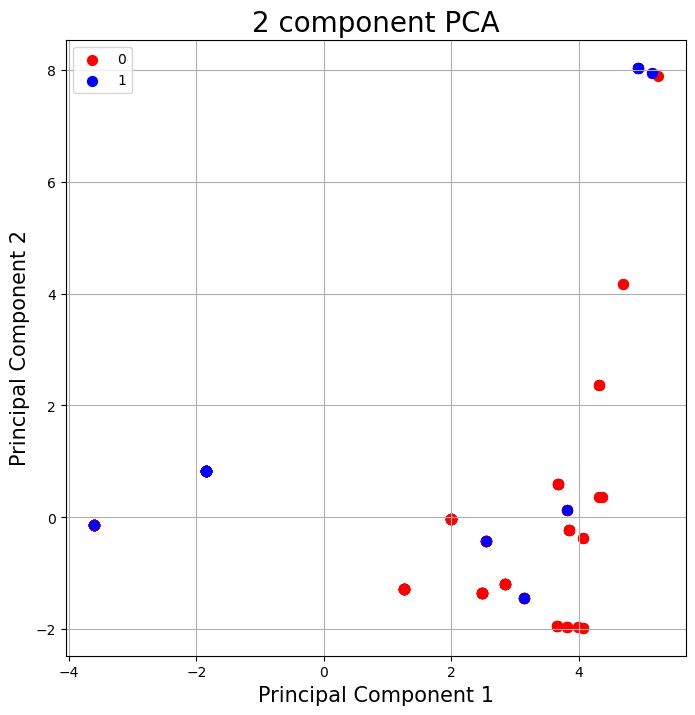

In [66]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0, 1]
colors = ['r', 'b']
for label, color in zip(targets,colors):
    indicesToKeep = finalDF['label'] == label
    ax.scatter(finalDF.loc[indicesToKeep, 'principal component 1']
               , finalDF.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [67]:
df_merchant['PCA 1'] = finalDF['principal component 1']
df_merchant['PCA 2'] = finalDF['principal component 2']
df_merchant

,seller_id,merchant action count,merchant action count ratio,merchant day count,merchant product diversity,merchant 1111 action count,merchant 1111 action count ratio,merchant 1111 activity ratio,merchant last week action count,merchant last week action count ratio,merchant last week activity ratio,last month action count,last month action count ratio,last month activity ratio,label,lda_features,PCA 1,PCA 2
0,145,36,0.093506,4,0.038462,30,0.131579,0.833333,36,0.101408,1.000000,36,0.098361,1.0,0,0,1.253732,-1.283491
1,145,36,0.093506,4,0.038462,30,0.131579,0.833333,36,0.101408,1.000000,36,0.098361,1.0,0,0,1.253732,-1.283491
2,145,36,0.093506,4,0.038462,30,0.131579,0.833333,36,0.101408,1.000000,36,0.098361,1.0,0,0,1.253732,-1.283491
3,145,36,0.093506,4,0.038462,30,0.131579,0.833333,36,0.101408,1.000000,36,0.098361,1.0,0,0,1.253732,-1.283491
4,145,36,0.093506,4,0.038462,30,0.131579,0.833333,36,0.101408,1.000000,36,0.098361,1.0,0,0,1.253732,-1.283491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,4760,105,0.272727,9,0.038462,67,0.293860,0.638095,101,0.284507,0.961905,105,0.286885,1.0,0,0,-3.607350,-0.128087
381,4760,105,0.272727,9,0.038462,67,0.293860,0.638095,101,0.284507,0.961905,105,0.286885,1.0,0,0,-3.607350,-0.128087
382,4760,105,0.272727,9,0.038462,67,0.293860,0.638095,101,0.284507,0.961905,105,0.286885,1.0,0,0,-3.607350,-0.128087
383,3263,18,0.046753,2,0.038462,13,0.057018,0.722222,18,0.050704,1.000000,18,0.049180,1.0,0,0,2.843356,-1.197991
